In [17]:
# import
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def expScheme(dx, dt, L, time):
    alpha = dt/dx**2
    
    Nx = int(L / dx)
    Nt = int(time / dt)
    
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, time, Nt)
    U = np.zeros((Nx, Nt)) # Holds values at all time steps
    U[:, 0] = np.sin(np.pi * x) # Initial conditions
 
    for j in range(Nt-1): # tid
        for i in range(1, Nx-1): # sted
            U[i, j+1] = alpha*U[i-1, j] + (1 - 2 * alpha) * U[i, j] + alpha * U[i+1, j]
    return x, t, U

In [41]:
def analsol(dx, dt, L, time):
    alpha = dt/dx**2
    
    Nx = int(L / dx)
    Nt = int(time / dt)
    
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, time, Nt)
    U = np.zeros((Nx, Nt)) # Holds values at all time steps
    U[:, 0] = np.sin(np.pi * x) # Initial conditions
 
    for j in range(Nt-1): # tid
        for i in range(1, Nx-1): # sted
            U[i,j+1] = np.exp(-np.pi**2*t[j+1])*np.sin(np.pi*x[i])
    return x, t, U

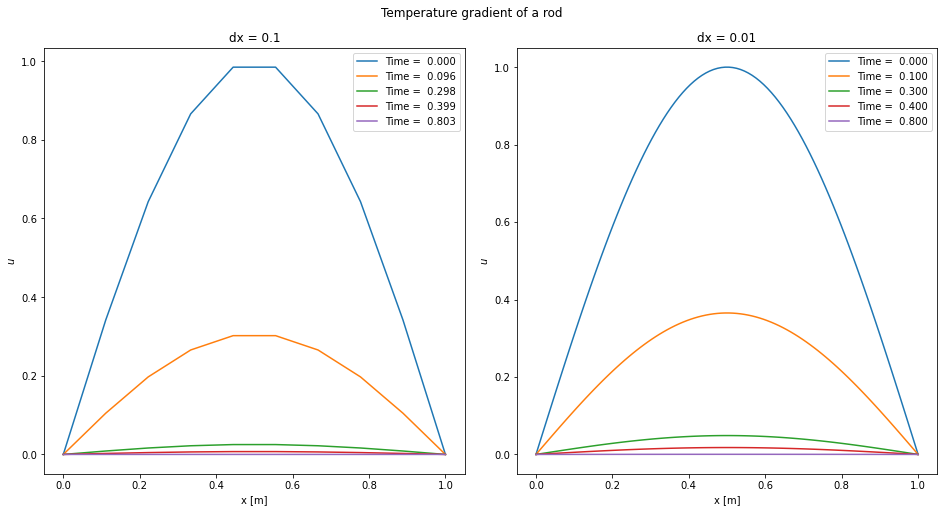

In [42]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (13,7))
fig.suptitle('Temperature gradient of a rod')

for i, dx in enumerate([0.1,0.01]):
    
    dt = dx**2 * 0.5
    L = 1
    time = 1
    x, t, u = expScheme(dx, dt, L, time)

    axs[i].set_title(f'dx = {dx}')
    for t_i in [0, int(len(t) * 0.1), int(len(t) * 0.3), int(len(t) * 0.4), int(len(t) * 0.8)]:
        axs[i].plot(x, u[:, t_i], label = f'Time =  {t[t_i]:0.3f}')
    axs[i].set_xlabel('x [m]')
    axs[i].set_ylabel('$u$ ')
    axs[i].legend()

In [46]:
dx = 0.01
dt = dx**2 * 0.5
L = 1
time = 1
x, t, u = analsol(dx, dt, L, time)

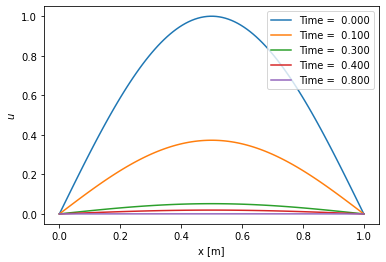

In [47]:
for t_i in [0, int(len(t) * 0.1), int(len(t) * 0.3), int(len(t) * 0.4), int(len(t) * 0.8)]:
    plt.plot(x, u[:, t_i], label = f'Time =  {t[t_i]:0.3f}')
plt.xlabel('x [m]')
plt.ylabel('$u$ ')
plt.legend()